In [1]:
import tellurium as te
import matplotlib.pyplot as plt
import libsbml

# function for plotting the phase portraits of a given model
# specify metabolites_list to analyze a specific set of metabolites
def plot_phase_portraits(libsbml_model, model_name, simulation, metabolites_list, outpath):
    model_phase_portraits = {}
    used_metabolites = []
    for metabolite in metabolites_list:
        model_phase_portraits[metabolite] = simulation[metabolite]
    for i in metabolites_list:
        for j in metabolites_list:
            if i != j and j not in used_metabolites:
                i_name = libsbml_model.getSpecies(i).getName()
                j_name = libsbml_model.getSpecies(j).getName()
                plt.figure()
                plt.title("Comparison between {} and {} [{}]".format(i_name, j_name, model_name))
                plt.xlabel(i_name)
                plt.ylabel(j_name)
                plt.plot(model_phase_portraits[i], model_phase_portraits[j])
                plt.savefig(outpath + "_" + i_name + "_vs_" + j_name + ".png")
                plt.show()
        used_metabolites.append(i)


def plot_pool_transient(simulation, title, phase_tuples, outpath):
    pool = 0
    for coefficient, component in phase_tuples:
        pool += coefficient * simulation[component]
    plt.figure()
    plt.title(title)
    plt.xlabel('t')
    plt.plot(pool)
    plt.savefig(outpath)
    plt.show()



def plot_pool_phase_portrait(simulation, title, phase_tuple1, name1, phase_tuple2, name2, outpath):
    pool1 = 0
    for coefficient, metabolite in phase_tuple1:
        pool1 += coefficient * simulation[metabolite]

    pool2 = 0
    for coefficient, metabolite in phase_tuple2:
        pool2 += coefficient * simulation[metabolite]
    plt.figure()
    plt.title(title)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.plot(pool1, pool2)
    plt.plot(pool1[0], pool2[0], c='r', label='t=0', marker='.')
    plt.plot(pool1[-1], pool2[-1], c='k', label='t->inf', marker='.')
    plt.legend()
    plt.savefig(outpath)
    plt.show()


def plot_tiled_phase_portraits(model, simulation, components_list, outpath, isReactions):
    model_phase_portraits = {}
    used_components = []
    for component in components_list:
        model_phase_portraits[component] = simulation[component]
    f, axarr = plt.subplots(len(components_list), len(components_list))
    for i in range(len(components_list)):
        for j in range(len(components_list)):
            if i != j and j not in used_components:
                x_component = model_phase_portraits[components_list[i]]
                y_component = model_phase_portraits[components_list[j]]
                axarr[i, j].plot(x_component, y_component)
                axarr[i, j].plot(x_component[0], y_component[0], c='r', label='t=0', marker='.')
                axarr[i, j].plot(x_component[-1], y_component[-1], c='k', label='t->inf', marker='.')
    for index, ax in enumerate(axarr.flat):
        x_index = index % len(components_list)
        y_index = index // len(components_list)
        if isReactions:
            xlabel = model.getReaction(components_list[x_index]).getId()
            ylabel = model.getReaction(components_list[y_index]).getId()
        else:
            xlabel = model.getSpecies(components_list[x_index]).getName()
            ylabel = model.getSpecies(components_list[y_index]).getName()
        ax.set(xlabel=xlabel, ylabel=ylabel)
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        ax.label_outer()
    plt.legend()
    plt.savefig(outpath)
    plt.show()

In [2]:
asansm_path = 'xml/iPAE1146_Amino_sugar_and_nucleotide_sugar_metabolism_fbc_squeezed_with_boundaries.xml'
pm_path = 'xml/iPAE1146_Pyrimidine_metabolism_fbc_squeezed_with_boundaries.xml'
lb_path = 'xml/iPAE1146_Lipopolysaccharide_biosynthesis_fbc_squeezed_with_boundaries.xml'
combined_model_path = 'xml/iPAE1146_Combined_Subsystems_fbc_squeezed_with_boundaries.xml'

asansm_libsbml_doc = libsbml.readSBML(asansm_path)
asansm_libsbml = asansm_libsbml_doc.getModel()
asansm_model = te.loadSBMLModel(asansm_path)
asansm_species = [species.getId() for species in asansm_libsbml.getListOfSpecies()]
pm_model = te.loadSBMLModel(pm_path)
pm_libsbml_doc = libsbml.readSBML(pm_path)
pm_libsbml = pm_libsbml_doc.getModel()
pm_species = [species.getId() for species in pm_libsbml.getListOfSpecies()]
lb_model = te.loadSBMLModel(lb_path)
lb_libsbml_doc = libsbml.readSBML(lb_path)
lb_libsbml = lb_libsbml_doc.getModel()
lb_species = [species.getId() for species in lb_libsbml.getListOfSpecies()]
combined_model = te.loadSBMLModel(combined_model_path)
combined_libsbml_doc = libsbml.readSBML(combined_model_path)
combined_libsbml = combined_libsbml_doc.getModel()
combined_species = [species.getId() for species in combined_libsbml.getListOfSpecies()]

speciesId2Name = {species.getId(): species.getName() for species in combined_libsbml.getListOfSpecies()}
speciesName2Id = {species.getName(): species.getId() for species in combined_libsbml.getListOfSpecies()}



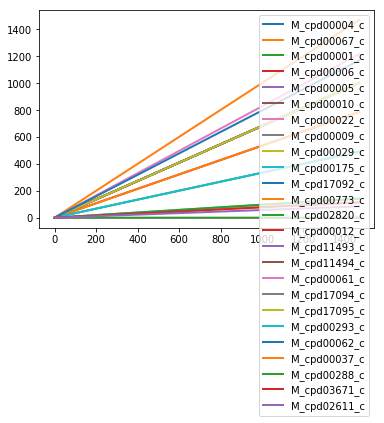

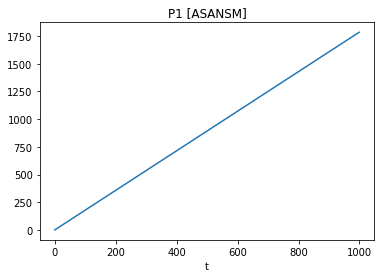

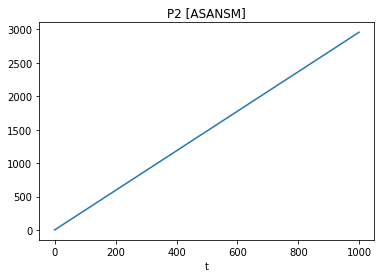

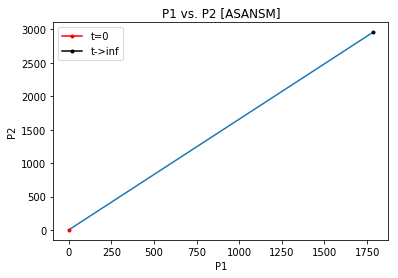

In [3]:
# ASANSM Simulation
asansm_model.reset()
asansm_model.integrator.setValue('stiff', True)
asansm_simulation = asansm_model.simulate(0, 1000, 1000, asansm_species)
asansm_model.plot(asansm_simulation)
# asansm_model.getSteadyStateValues()
# asansm_phase_metabolites = []  # insert the metabolites to be considered in the phase portraits

# plot_phase_portraits(asansm_libsbml, "ASANSM", asansm_simulation, asansm_phase_metabolites, "plots/asansm")

# Choose two conservation and a disequilibrium pool
asansm_conservation_pool1 = [(1, 'NADP'), (1, 'NADPH')]
asansm_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in asansm_conservation_pool1]

asansm_conservation_pool2 = [(1, 'NAD'), (1, 'H2O'), (1, 'Acetate')]
asansm_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in asansm_conservation_pool2]

# 3. Disequilibrium
pass

# Plot it
plot_pool_transient(asansm_simulation, "P1 [ASANSM]", asansm_conservation_pool1, "plots/asansm_pool1.png")
plot_pool_transient(asansm_simulation, "P2 [ASANSM]", asansm_conservation_pool2, "plots/asansm_pool2.png")
plot_pool_phase_portrait(asansm_simulation, "P1 vs. P2 [ASANSM]", asansm_conservation_pool1, "P1",
                         asansm_conservation_pool2, "P2", "plots/asansm_p1vsp2.png")

# asansm_model.getSteadyStateValues()

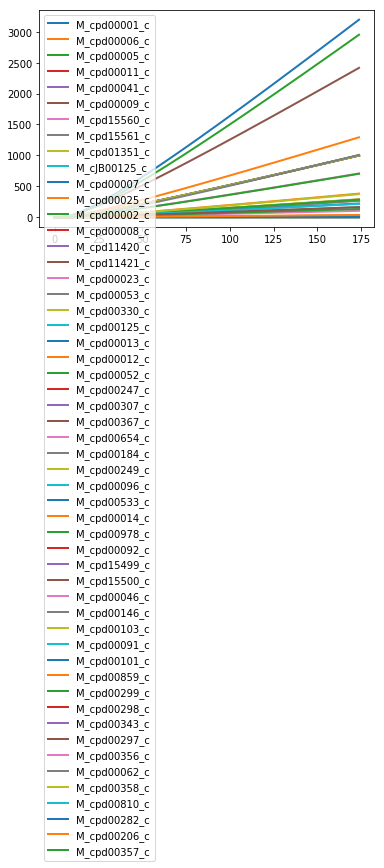

In [4]:
# PM Simulation
pm_model.reset()
pm_simulation = pm_model.simulate(0, 1000, 1000, pm_species)
pm_model.plot(pm_simulation)
# Choose two conservation and a disequilibrium pool
pm_conservation_pool1 = [(1, 'Ubiquinone-8'), (1, 'Ubiquinol-8')]
pm_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in pm_conservation_pool1]

pm_conservation_pool2 = [(-1, 'H+'), (-1, "H2O"), (-2, "L-Aspartate"), (1, "trdox"), (1, "L-Glutamate"),
                         (-2, "NH3"), (-1, "PPi"), (-1, "Cytosine"), (-1, "Uracil"), (1, "Orotidylic acid")]
pm_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in pm_conservation_pool2]
# 3. Disequilibrium
pass

#Plot it
pass

# pm_model.getSteadyStateValues()

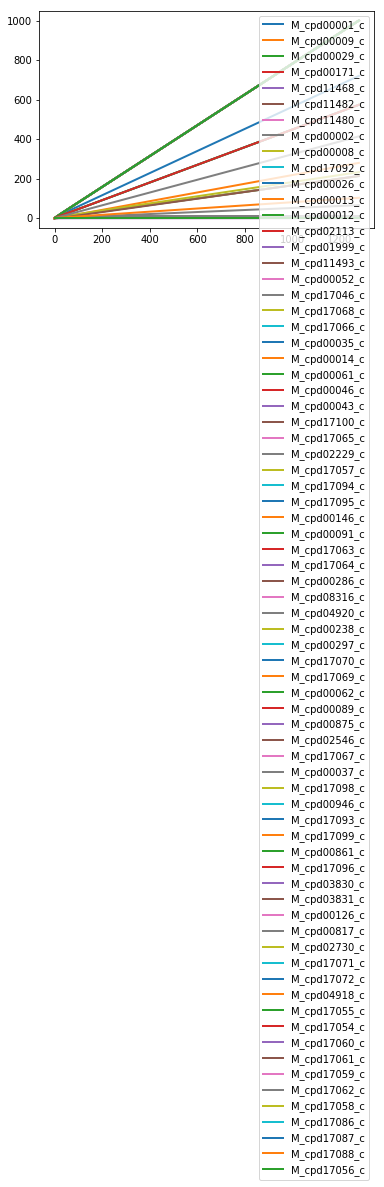

In [5]:
# LB Simulation
lb_model.reset()
lb_simulation = lb_model.simulate(0, 1000, 1000, lb_species)
lb_model.plot(lb_simulation)
# Choose two conservation and a disequilibrium pool
lb_conservation_pool1 = [(1, '(R)-3-Hydroxydecanoyl-[acyl-carrier protein]'),
                         (1, '2-hydroxydodecanoyl-[acyl-carrier protein]'),
                         (1, 'ACP'), (1, 'D-3-Hydroxydodecanoyl-[acp]'), (1, 'Dodecanoyl-ACP')]
lb_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in lb_conservation_pool1]

lb_conservation_pool2 = [(1, '3-Deoxy-D-manno-octulosonate8-phosphate'), (1, 'ATP'),
                         (1, 'D-Glycero-D-manno-heptose1-7-bisphosphate'), (-1, 'D-Glycero-D-manno-heptose1-phosphate'),
                         (2, 'PA_core7_lipidA'), (1, 'Phosphate'), (2, 'Phosphoenolpyruvate'),
                         (1, 'Pseudomonas aeruginosa Lipid A precursor')]
lb_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in lb_conservation_pool2]

# 3. Disequilibrium
pass
#Plot it


# lb_model.getSteadyStateValues()

# plot_phase_portraits(lb_model, lb_simulation)

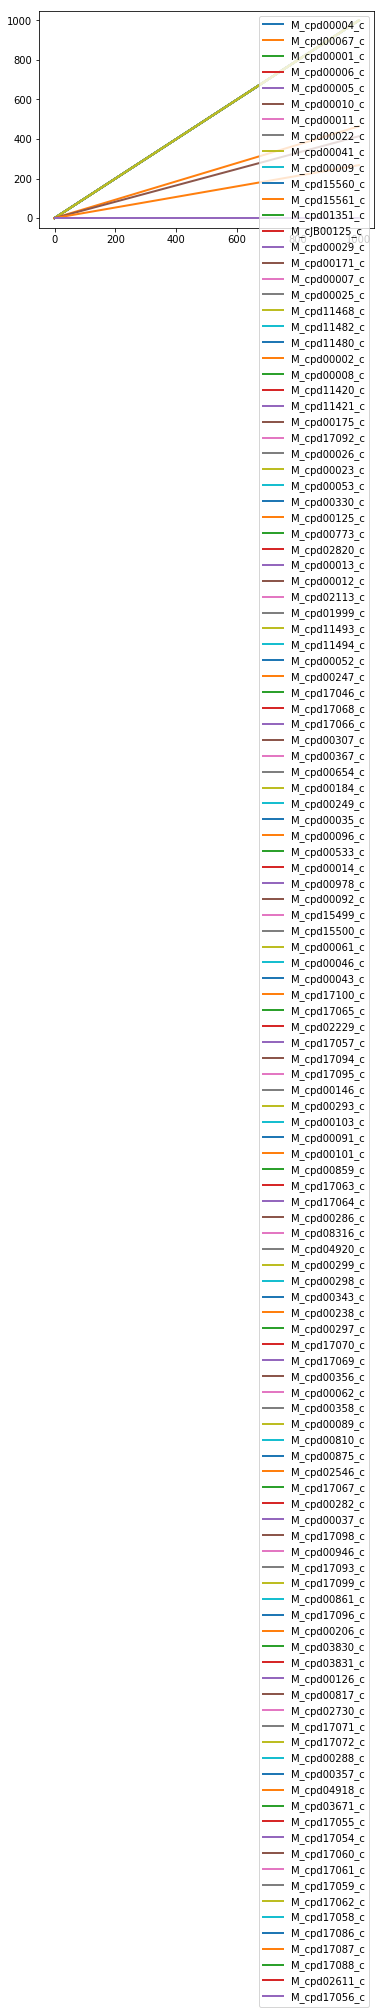

In [6]:
# Combined Simulation
combined_model.reset()
combined_model_simulation = combined_model.simulate(0, 1000, 1000, combined_species)
combined_model.plot(combined_model_simulation)

# combined_model.getSteadyStateValues()

# plot_phase_portraits(combined_model, combined_model_simulation)

